In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
from datetime import date

## Dataset Atletas Olímpicos (desde 1968 a 2022)  
#### Proyecto Inteligencia Artificial (IS-701) | Sección 11:00  

**Catedrático:** Ing. Uayeb Caballero.  

*Grupo* <span style="color:#757331">***Cardamomo***</span>  
Integrantes:  
> - Owenn Alexis Chavarría Rivera  
N° ***20161003613***
> - Kenet Francisco Orellana Meza  
N° ***20141011708***
> - Jakmeni Jasiel Quilico Valeriano  
N° ***20161004456***
> - Melvin Elías Cedillo Romero  
N° ***20171005421***

Fuente Dataset: https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg

### Significado de variables dentro del Dataset:  

**OA** = Olympic Athlete 

### Contexto del Dataset: Jugadores Olímpicos
Este conjunto de datos es un intento de crear conjuntos de datos de jugadores olímpicos actualizados (desde los Juegos Olímpicos de 1986 hasta 2022) para que cualquier amante de los deportes y los datos los use para visualizar y crear algunas ideas sobre el conjunto de datos de jugadores (atletas) olímpicos. Este conjunto de datos contiene 154,902 atletas únicos y su información biológica, es decir, altura, peso y fecha de nacimiento.

### Importando el Dataset a Jupiter Notebook:

In [8]:
OA = pd.read_csv("Olympic_Athlete.csv")

In [9]:
OA.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc
0,14503,scar Giraldo,Male,1973-04-13,NaN,100.0,Colombia,COL
1,58758,Hossein Mollaghasemi,Male,1933-03-15,173.0,63.0,Islamic Republic of Iran,IRI


In [10]:
OA.dtypes

athlete_id       int64
name            object
sex             object
born            object
height         float64
weight         float64
country         object
country_noc     object
dtype: object

In [11]:
OA["born"] = pd.to_datetime(OA["born"])

In [12]:
OA.dtypes

athlete_id              int64
name                   object
sex                    object
born           datetime64[ns]
height                float64
weight                float64
country                object
country_noc            object
dtype: object

### Análisis de valores nulos:

In [13]:
OA.isnull().values.any()

True

In [14]:
OA.isnull().head(5)

,athlete_id,name,sex,born,height,weight,country,country_noc
0,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


#### Análisis de columnas para comprobar si hay o no valores nulos (NaN):

In [15]:
OA.isnull().any()

athlete_id     False
name           False
sex            False
born            True
height          True
weight         False
country        False
country_noc    False
dtype: bool

In [16]:
OA.isnull().sum()

athlete_id         0
name               0
sex                0
born            4467
height         50420
weight             0
country            0
country_noc        0
dtype: int64

#### Funciones de Ventana

In [17]:
OA["country_noc"].drop_duplicates().head(5)

0    COL
1    IRI
2    ITA
3    PNG
4    GEO
Name: country_noc, dtype: object

#### Quitando valores nulos 

In [18]:
OA = OA.dropna()

In [19]:
OA.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc
1,58758,Hossein Mollaghasemi,Male,1933-03-15,173.0,63.0,Islamic Republic of Iran,IRI
2,90217,Enrico Lazzarotto,Male,1973-01-14,178.0,72.0,Italy,ITA


#### Estadísticas descriptivas del Dataset:

In [20]:
OA.describe()

,athlete_id,height,weight
count,1.043700e+05,104370.000000,104370.000000
mean,9.605097e+04,176.323014,71.496733
std,1.663394e+05,10.362989,13.293572
min,2.000000e+00,127.000000,21.000000
25%,4.244725e+04,170.000000,62.000000
50%,8.104850e+04,176.000000,70.000000
75%,1.126068e+05,183.000000,80.000000
max,2.506239e+06,226.000000,100.000000


### Análisis de valores atípicos

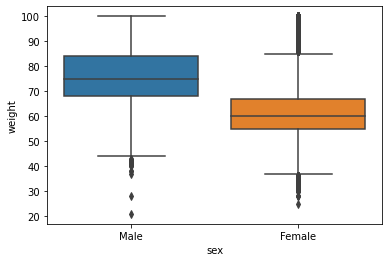

In [21]:
sns.boxplot( data=OA  , x="sex" , y="weight" )
plt.show()

### Para visualizar los cambios seleccionaremos 3 países:

In [22]:
men = OA.loc[(OA["sex"] == "Male") & (OA["country_noc"].isin(["MEX", "ITA", "ESP"])) , :]

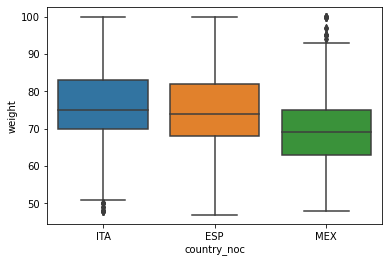

In [23]:
sns.boxplot( data=men  , x="country_noc" , y="weight" )
plt.show()

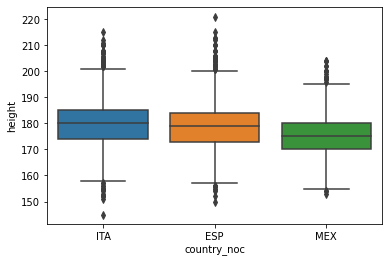

In [24]:
sns.boxplot( data=men  , x="country_noc" , y="height" )
plt.show()

In [25]:
women = OA.loc[(OA["sex"] == "Female") & (OA["country_noc"].isin(["MEX", "ITA", "ESP"])) , :]

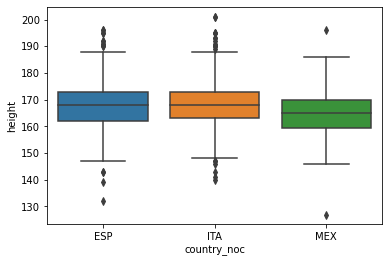

In [26]:
sns.boxplot( data=women  , x="country_noc" , y="height" )
plt.show()

<AxesSubplot:xlabel='country_noc', ylabel='weight'>

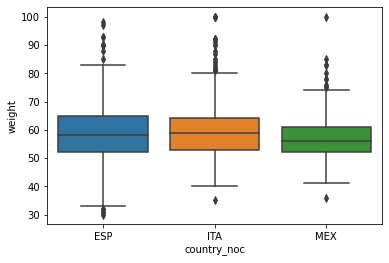

In [27]:
sns.boxplot( data=women  , x="country_noc" , y="weight" )

**NOTA:** para limpiar los valores atipicos y debido a la diferencia en los rasgos fisicos entre hombre y mujer esta sera nuestra categoria primaria. Luego tambien separaremos a los atletas por paises ya que tambien los rasgos fisicos de las personas son caracteristicos segun su procesencia.

##### Tratando valores atipicos de el peso

OAw_qn = Atletas olimpicos peso quartil n

In [28]:
OAw_q1 = OA.loc[: , ["country_noc", "sex", "weight"]].groupby(["country_noc", "sex"], as_index = False).quantile(0.25)
OAw_q1.columns = ["country_noc", "sex", "weight_q1"]

In [29]:
OAw_q2 = OA.loc[: , ["country_noc", "sex", "weight"]].groupby(["country_noc", "sex"], as_index = False).mean()
OAw_q2.columns = ["country_noc", "sex", "weight_q2"]

In [30]:
OAw_q3 = OA.loc[: , ["country_noc", "sex", "weight"]].groupby(["country_noc", "sex"], as_index = False).quantile(0.75)
OAw_q3.columns = ["country_noc", "sex", "weight_q3"]

Haciendo el join y calculando el inter quantile

In [31]:
OAw_iqr = OAw_q1.merge(OAw_q2, on = ["country_noc", "sex"], how = "inner").merge(OAw_q3, on = ["country_noc", "sex"], how = "inner")

In [32]:
OAw_iqr.head(2)

,country_noc,sex,weight_q1,weight_q2,weight_q3
0,AFG,Female,54.25,58.25,59.50
1,AFG,Male,57.75,67.50,74.25


In [33]:
OAw_iqr["iqr"] = OAw_iqr.apply(lambda q: q["weight_q3"] - q["weight_q1"], axis = 1)

In [34]:
OAw_iqr.head(2)

,country_noc,sex,weight_q1,weight_q2,weight_q3,iqr
0,AFG,Female,54.25,58.25,59.50,5.25
1,AFG,Male,57.75,67.50,74.25,16.50


In [35]:
OAw_iqr["upper_weight"] = OAw_iqr.apply(lambda q: q["weight_q3"] + 1.5*q["iqr"], axis = 1)
OAw_iqr["lower_weight"] = OAw_iqr.apply(lambda q: q["weight_q1"] - 1.5*q["iqr"], axis = 1)

In [36]:
OAw_iqr.head(2)

,country_noc,sex,weight_q1,weight_q2,weight_q3,iqr,upper_weight,lower_weight
0,AFG,Female,54.25,58.25,59.50,5.25,67.375,46.375
1,AFG,Male,57.75,67.50,74.25,16.50,99.000,33.000


Quitando las columnas no utilizadas

In [37]:
OAw_iqr = OAw_iqr.loc[:, ["country_noc", "sex", "upper_weight", "lower_weight", "weight_q2"]]

In [38]:
OAw_iqr.head(2)

,country_noc,sex,upper_weight,lower_weight,weight_q2
0,AFG,Female,67.375,46.375,58.25
1,AFG,Male,99.000,33.000,67.50


In [39]:
OA_m1 = OA.merge(OAw_iqr, on = ["country_noc", "sex"], how = "left")

In [40]:
OA_m1.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc,upper_weight,lower_weight,weight_q2
0,58758,Hossein Mollaghasemi,Male,1933-03-15,173.0,63.0,Islamic Republic of Iran,IRI,109.0,37.0,73.539192
1,90217,Enrico Lazzarotto,Male,1973-01-14,178.0,72.0,Italy,ITA,102.5,50.5,76.390435


Funcion para centrar los valores atipicos

In [41]:
def getRealWeight(r):
    if ((r["weight"] <= r["lower_weight"]) | (r["weight"] >= r["upper_weight"])):
        return r["weight_q2"]
    else:
        return r["weight"]

In [42]:
OA_m1["weight"] = OA_m1.apply(lambda r: getRealWeight(r), axis = 1)

Seleccionando columnas nesesarias 

In [43]:
OA_m1 = OA_m1.loc[:, ["athlete_id", "name", "sex", "born", "weight", "country", "country_noc"]]

In [44]:
OA_m1.head(2)

,athlete_id,name,sex,born,weight,country,country_noc
0,58758,Hossein Mollaghasemi,Male,1933-03-15,63.0,Islamic Republic of Iran,IRI
1,90217,Enrico Lazzarotto,Male,1973-01-14,72.0,Italy,ITA


##### Tratando valores atipicos de el peso

OAh_qn = Atletas olimpicos altura quartil n

In [45]:
OAh_q1 = OA.loc[: , ["country_noc", "sex", "height"]].groupby(["country_noc", "sex"], as_index = False).quantile(0.25)
OAh_q1.columns = ["country_noc", "sex", "height_q1"]

In [46]:
OAh_q2 = OA.loc[: , ["country_noc", "sex", "height"]].groupby(["country_noc", "sex"], as_index = False).mean()
OAh_q2.columns = ["country_noc", "sex", "height_q2"]

In [47]:
OAh_q3 = OA.loc[: , ["country_noc", "sex", "height"]].groupby(["country_noc", "sex"], as_index = False).quantile(0.75)
OAh_q3.columns = ["country_noc", "sex", "height_q3"]

Join y calculo de inter quantile

In [48]:
OAh_iqr = OAh_q1.merge(OAh_q2, on = ["country_noc", "sex"], how = "inner").merge(OAh_q3, on = ["country_noc", "sex"], how = "inner")

In [49]:
OAh_iqr.head(2)

,country_noc,sex,height_q1,height_q2,height_q3
0,AFG,Female,163.75,167.500000,168.75
1,AFG,Male,165.75,170.416667,176.50


In [50]:
OAh_iqr["iqr"] = OAh_iqr.apply(lambda q: q["height_q3"] - q["height_q1"], axis = 1)

In [51]:
OAh_iqr.head(2)

,country_noc,sex,height_q1,height_q2,height_q3,iqr
0,AFG,Female,163.75,167.500000,168.75,5.00
1,AFG,Male,165.75,170.416667,176.50,10.75


In [52]:
OAh_iqr["upper_height"] = OAh_iqr.apply(lambda q: q["height_q3"] + 1.5*q["iqr"], axis = 1)
OAh_iqr["lower_height"] = OAh_iqr.apply(lambda q: q["height_q1"] - 1.5*q["iqr"], axis = 1)

In [53]:
OAh_iqr.head(2)

,country_noc,sex,height_q1,height_q2,height_q3,iqr,upper_height,lower_height
0,AFG,Female,163.75,167.500000,168.75,5.00,176.250,156.250
1,AFG,Male,165.75,170.416667,176.50,10.75,192.625,149.625


Limpiando columnas

In [54]:
OAh_iqr = OAh_iqr.loc[:, ["country_noc", "sex", "upper_height", "lower_height", "height_q2"]]

In [55]:
OAh_iqr.head(2)

,country_noc,sex,upper_height,lower_height,height_q2
0,AFG,Female,176.250,156.250,167.500000
1,AFG,Male,192.625,149.625,170.416667


In [56]:
OA_m2 = OA.merge(OAh_iqr, on = ["country_noc", "sex"], how = "left")

In [57]:
OA_m2.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc,upper_height,lower_height,height_q2
0,58758,Hossein Mollaghasemi,Male,1933-03-15,173.0,63.0,Islamic Republic of Iran,IRI,200.0,152.0,176.254157
1,90217,Enrico Lazzarotto,Male,1973-01-14,178.0,72.0,Italy,ITA,201.5,157.5,179.805566


### Función centrar valores atípicos

In [58]:
def getRealHeight(r):
    if ((r["height"] <= r["lower_height"]) | (r["height"] >= r["upper_height"])):
        return r["height_q2"]
    else:
        return r["height"]

In [59]:
OA_m2["height"] = OA_m2.apply(lambda r: getRealHeight(r), axis = 1)

In [60]:
OA_m2 = OA_m2.loc[:, ["athlete_id", "name", "sex", "born", "height", "country", "country_noc"]]

In [61]:
OA_m2.head(2)

,athlete_id,name,sex,born,height,country,country_noc
0,58758,Hossein Mollaghasemi,Male,1933-03-15,173.0,Islamic Republic of Iran,IRI
1,90217,Enrico Lazzarotto,Male,1973-01-14,178.0,Italy,ITA


### Resultado final de análisis de valores atípicos

In [62]:
OA_f = OA_m1.merge(OA_m2, on = ["athlete_id", "name", "sex", "born", "country", "country_noc"], how = "left")

In [63]:
OA_f = OA_f.loc[:, ["athlete_id", "name", "sex", "country_noc", "born", "height", "weight"]]

data set final

In [64]:
OA_f.head(2)

,athlete_id,name,sex,country_noc,born,height,weight
0,58758,Hossein Mollaghasemi,Male,IRI,1933-03-15,173.0,63.0
1,90217,Enrico Lazzarotto,Male,ITA,1973-01-14,178.0,72.0


pruebas

In [65]:
men_f = OA_f.loc[(OA_f["sex"] == "Male") & (OA_f["country_noc"].isin(["MEX", "ITA", "ESP"])) , :]

<AxesSubplot:xlabel='country_noc', ylabel='weight'>

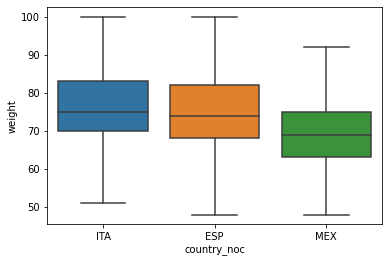

In [66]:
sns.boxplot( data=men_f  , x="country_noc" , y="weight" )

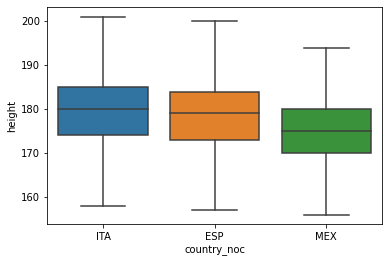

In [67]:
sns.boxplot( data=men_f  , x="country_noc" , y="height" )
plt.show()

In [68]:
woman_f = OA_f.loc[(OA_f["sex"] == "Female") & (OA_f["country_noc"].isin(["MEX", "ITA", "ESP"])) , :]

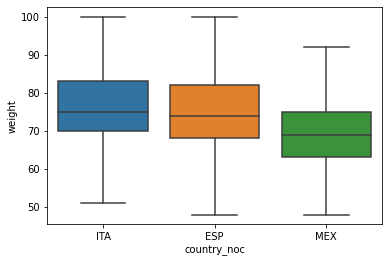

In [69]:
sns.boxplot( data=men_f  , x="country_noc" , y="weight" )
plt.show()

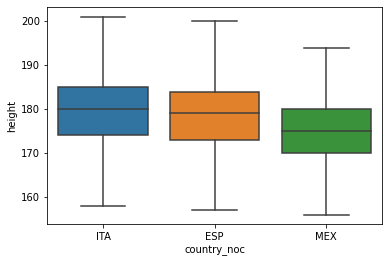

In [70]:
sns.boxplot( data=men_f  , x="country_noc" , y="height" )
plt.show()

### DATASET final sin valores atípicos

In [71]:
OA_f

,athlete_id,name,sex,country_noc,born,height,weight
0,58758,Hossein Mollaghasemi,Male,IRI,1933-03-15,173.0,63.0
1,90217,Enrico Lazzarotto,Male,ITA,1973-01-14,178.0,72.0
2,74565,John Hou,Male,PNG,1968-09-25,178.0,60.0
3,134090,Beka Gviniashvili,Male,GEO,1995-10-26,175.0,95.0
4,69607,Harold Wilson,Male,GBR,1885-01-22,162.0,52.0
...,...,...,...,...,...,...,...
104365,126892,Hannah Starling,Female,GBR,1995-06-12,158.0,59.0
104366,107925,Annett Gamm,Female,GER,1977-05-28,167.0,54.0
104367,30898,Hermenegildo Candeias,Male,POR,1934-04-17,162.0,55.0
104368,137209,Brad Hall,Male,GBR,1990-11-16,188.0,100.0


### Transformaciones

In [72]:
OA_f.dtypes

athlete_id              int64
name                   object
sex                    object
country_noc            object
born           datetime64[ns]
height                float64
weight                float64
dtype: object

In [74]:
OA_f.columns

Index(['athlete_id', 'name', 'sex', 'country_noc', 'born', 'height', 'weight'], dtype='object')

In [75]:
OA_n = OA_f.loc[ : , ['athlete_id', 'born', 'height', 'weight']].copy()

In [76]:
OA_n

,athlete_id,born,height,weight
0,58758,1933-03-15,173.0,63.0
1,90217,1973-01-14,178.0,72.0
2,74565,1968-09-25,178.0,60.0
3,134090,1995-10-26,175.0,95.0
4,69607,1885-01-22,162.0,52.0
...,...,...,...,...
104365,126892,1995-06-12,158.0,59.0
104366,107925,1977-05-28,167.0,54.0
104367,30898,1934-04-17,162.0,55.0
104368,137209,1990-11-16,188.0,100.0


Se hará uso de **height** = altura y **weight** = peso

In [100]:
x = OA_n["height"]
y = OA_n["weight"]

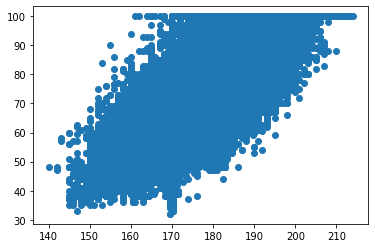

In [101]:
plt.scatter(x,y)
plt.show()

#### Correlaciones

> - **R** = 1 las variables tienen una correlación positiva perfecta.  
> - **R** = 0 no hay relación lineal entre las variables.  
> - **R** = -1 las variables están perfectamente correlacionadas de forma negativa o inversa.  

In [102]:
OA_n.corr()

,athlete_id,height,weight
athlete_id,1.000000,-0.010632,-0.016846
height,-0.010632,1.000000,0.787670
weight,-0.016846,0.787670,1.000000


In [95]:
O = OA_n.corr()

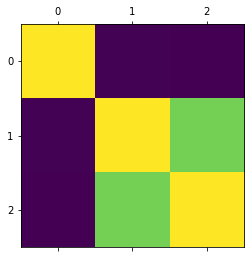

In [97]:
plt.matshow(O)
plt.show()

In [118]:
O["heightVSweight"] = O.apply(lambda r: r["weight"]*2+2/2, axis = 1)

In [119]:
O

,athlete_id,height,weight,heightVSweight
athlete_id,1.000000,-0.010632,-0.016846,0.966308
height,-0.010632,1.000000,0.787670,2.575339
weight,-0.016846,0.787670,1.000000,3.000000


## ML no supervisado